Queremos generar números aleatorios con una distribución normal.

Para ello sabemos generar fácilmente números aleatorios con distribución exponencial.

In [1]:
import scipy.stats as st
import numpy as np
from random import random
from functools import partial
from matplotlib import pyplot as plt

In [2]:
f = partial(st.norm.pdf, loc=0, scale=1.)
g = partial(st.expon.pdf, loc=0, scale=1.)

$$f(x)=\frac{1}{\sqrt{2\pi}} e^{-x²/2}$$

$$g(x)=e^{-x}$$

$$\frac{f(x)}{g(x)}=\frac{1}{\sqrt{2\pi}} e^{x-x²/2}$$

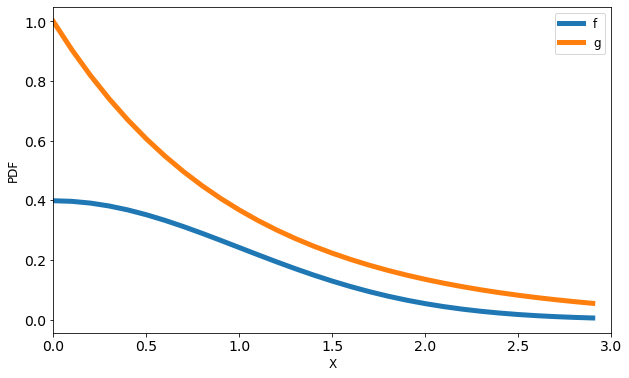

In [3]:
t = np.arange(0, 3, 0.1)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(t, f(t), linewidth=5, label='f')
ax.plot(t, g(t), linewidth=5, label='g')
ax.set_xlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('PDF')
ax.legend()

Buscamos $x$ tal que $$\frac{d}{dx}exp(x-x^2/2)=0$$

$$\implies \frac{d}{dx}(x-x^2/2)=0 \implies  1-x=0 \implies x=1$$

Por lo tanto, 

$$c=\left.max\left(\frac{f}{g}\right)\right|_{x=1} = \frac{f(1)}{g(1)} = \sqrt{\frac{2e}{\pi}}$$

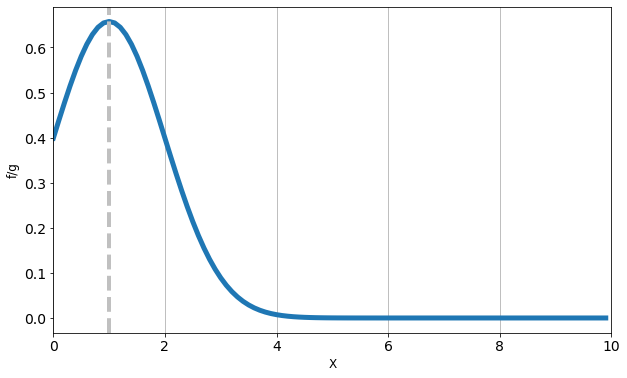

In [148]:
t = np.arange(0, 10, 0.1)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(t, f(t)/g(t), linewidth=5)
ax.set_xlim(0, 10)
ax.set_xlabel('X')
ax.set_ylabel('f/g')
ax.axvline(1, linestyle='--', color='silver', lw=4)
ax.grid(axis='x')

In [4]:
c = f(1)/g(1)

print(c)

0.657744623479457


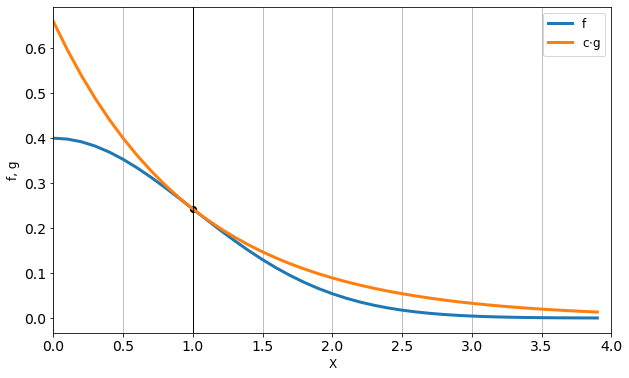

In [5]:
t = np.arange(0, 4, 0.1)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(t, f(t), lw=3, label='f')
ax.plot(t, g(t)*c, lw=3, label=r'c$\cdot$g')
plt.axvline(x=1.,c='k',lw=1)
plt.scatter([1],f(1),c='k')

ax.set_xlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('f, g')
ax.grid(axis='x')
ax.legend()

Ahora hagamos un generador de números aleatorios con una distribución exponencial

In [20]:
-np.log(random())

2.356836250139212

In [22]:
f(0.5) / (c*g(0.5))

0.8824969025845955

In [26]:
N = 10000
k=0
r = []
condicion = True
while condicion:
    condicion = k<N
    x = -np.log(random())
    proba = f(x) / (c*g(x))
    if random() < proba:
        r.append(x)
        k+=1

In [41]:
import numpy
import random

random1 = numpy.random.rand()
random2 = random.random()

In [24]:
r = np.array(r)
r[::2] = -r[::2]

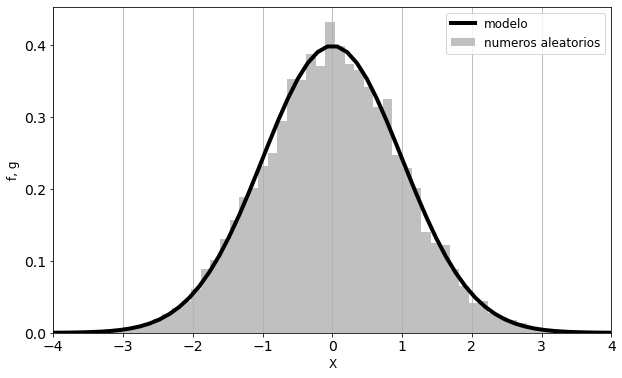

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

H = plt.hist(r, 50, density=True, color='silver', label='numeros aleatorios')
x = np.linspace(-7,7,100)
y = f(x)
plt.plot(x,y, linewidth=4, color='k', label='modelo')

ax.set_xlim(-4, 4)
ax.set_xlabel('X')
ax.set_ylabel('f, g')
ax.grid(axis='x')
ax.legend()


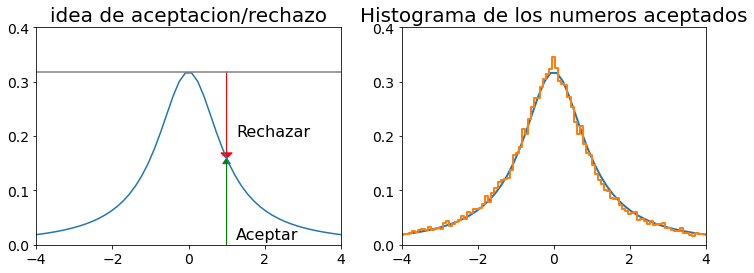

In [172]:
"""
Suppose we want to sample from the (truncated) T distribution 
with 10 degrees of freedom
We use the uniform as a proposal distibution (highly inefficient)
"""

from scipy import stats as st
x = np.linspace(-4, 4)

df = 10
dist = st.cauchy()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Rechazar', fontsize=16)
plt.text(px+.25, 0.01, 'Aceptar', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('idea de aceptacion/rechazo', fontsize=20)

plt.subplot(122)
n = 100000
# generate from sampling distribution
u = np.random.uniform(-4, 4, n)
# accept-reject criterion for each point in sampling distribution
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)]

plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)

plt.axis([-4,4,0,0.4])
plt.title('Histograma de los numeros aceptados', fontsize=20);